# PIL: Python 图像处理类库
---

In [1]:
%pylab inline
import os
os.chdir(os.path.join(os.curdir,'data'))

Populating the interactive namespace from numpy and matplotlib


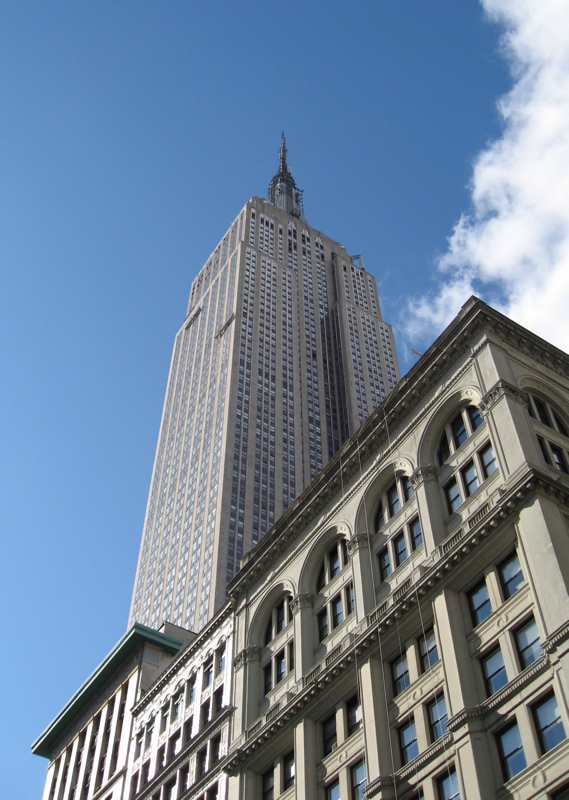

In [2]:
from PIL import Image
pil_im = Image.open('empire.jpg')
pil_im

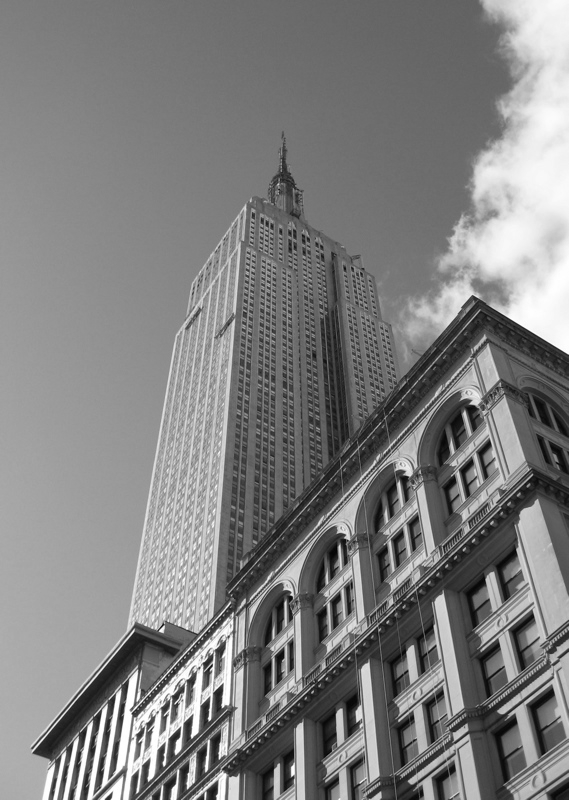

In [3]:
Image.open('empire.jpg').convert('L')

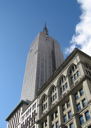

In [4]:
thumbnail = pil_im.copy()
thumbnail.thumbnail((128,128))  # 缩略图
thumbnail

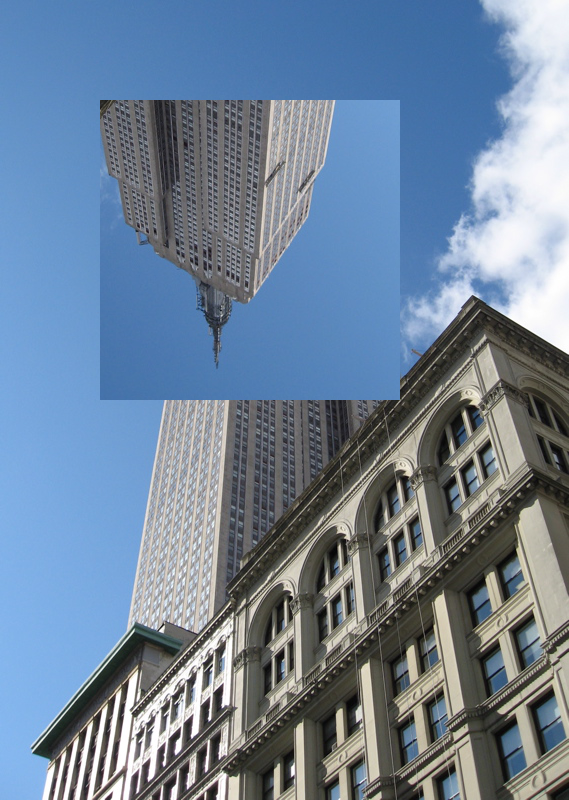

In [5]:
box = (100,100,400,400)  # (左,上,右,下)
region = pil_im.crop(box)  # 剪裁指定区域
region = region.transpose(Image.ROTATE_180)  # 转180度
tmp = pil_im.copy()
tmp.paste(region,box)  # 黏贴回去
tmp

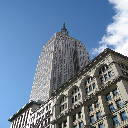

In [6]:
pil_im.resize((128,128))  # 生成指定大小的新图像

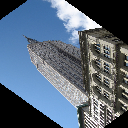

In [7]:
pil_im.rotate(45).resize((128,128))  # 逆时针转45度

# Matplotlib
---

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


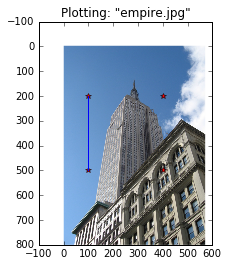

In [9]:
from PIL import Image
from pylab import *

im = array(Image.open('empire.jpg'))

imshow(im)

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
plot(x, y, 'r*')

plot(x[:2], y[:2])

#axis('off')

title('Plotting: "empire.jpg"')
show()

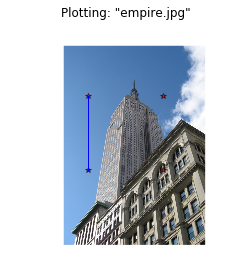

In [10]:
from PIL import Image
from pylab import *

im = array(Image.open('empire.jpg'))

imshow(im)

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
plot(x, y, 'r*')

plot(x[:2], y[:2])

axis('off')

title('Plotting: "empire.jpg"')
show()

绘图格式命令:

* b : blue.   蓝
* g : green   绿
* r : red.    红
* c : cyan.   青
* m : magenta. 品红
* y : yellow.  黄
* k : black   黑
* w : white   白

* \-  : 实线
* -- : 虚线
* :  : 点线

* .  : 点
* o  : 圈
* s  : 正方形
* \*  : 星形
* \+  : 加号
* x  : 叉号

## 直方图
---

(0.0, 600.0, 0.0, 800.0)

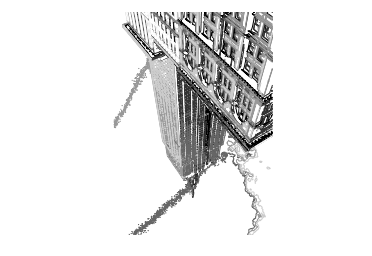

In [11]:
im = pil_im.convert('L')
figure()
gray()  # 指定为黑白色
contour(im, orign='image')  # 轮廓图像
axis('equal')  # 不变形
axis('off')  # 不显示

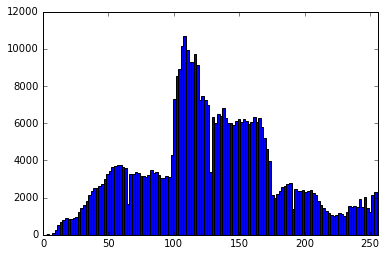

In [12]:
figure()
np_im = np.array(im)
hist(np_im.flatten(),128)  # 直方图
xlim([0,256])
show()

### OpenCV 直方图

<Container object of 128 artists>

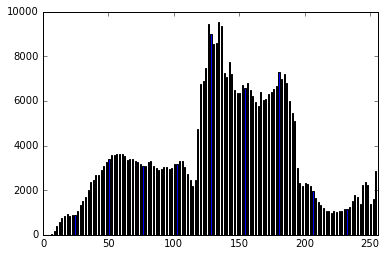

In [13]:
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate ]]) -> hist
import cv2
im = cv2.cvtColor(array(pil_im),cv2.COLOR_BGR2GRAY)  # 转为灰度图像
hist_item = cv2.calcHist([im],[0],None,[128],[0,256]) # 计算直方图
xlim([0,256])
bar(array([x for x in range(128)])*2,hist_item)

<Container object of 256 artists>

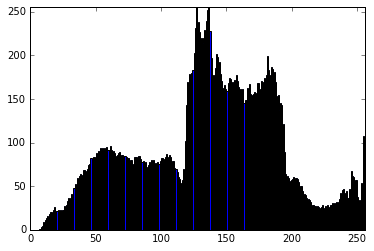

In [14]:
hist_item = cv2.calcHist([im],[0],None,[256],[0,256]) # 计算直方图
cv2.normalize(hist_item,hist_item,0,255,cv2.NORM_MINMAX) # 归一化到 [0,255]的范围
hist_item=np.int32(np.around(hist_item))  # 像素取整
ylim([0,256])
xlim([0,256])
bar([x for x in range(256)],hist_item)

In [15]:
## 交互式标注
# im = pil_im.copy()
# x = ginput(3)  # 点击3次选择3个点
# x

# Numpy
---


In [16]:
im = np.array(pil_im.copy())
i,j,k = 0,0,0
im[i,j,k]  # 坐标 i行,j列,颜色通道 k

88

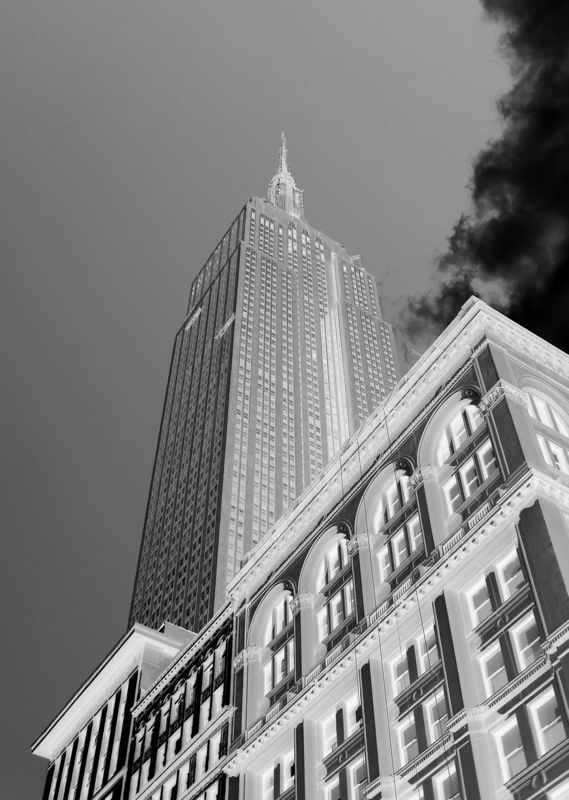

In [17]:
# 灰度变换
im = np.array(pil_im.copy().convert('L'))
Image.fromarray(255 - im) # 对图像反相处理

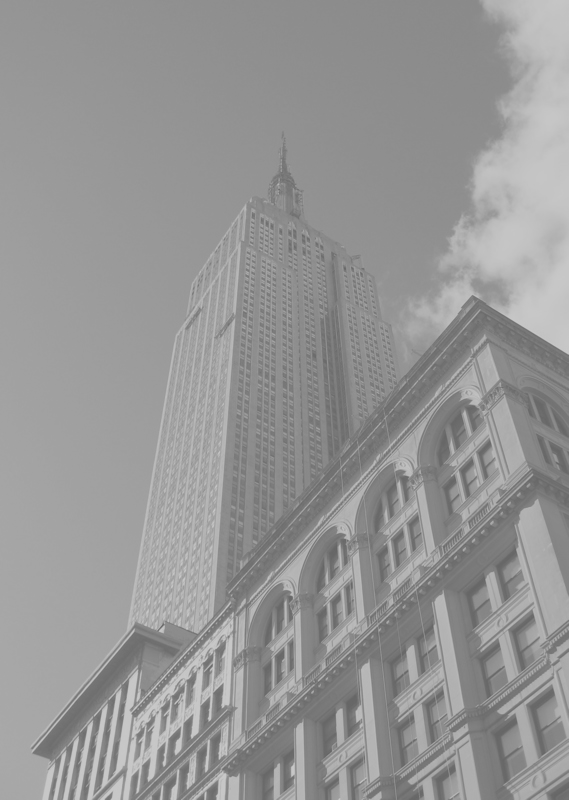

In [18]:
Image.fromarray(uint8((100.0/255.0)*im + 100))  # 将像素值变换到 100..200

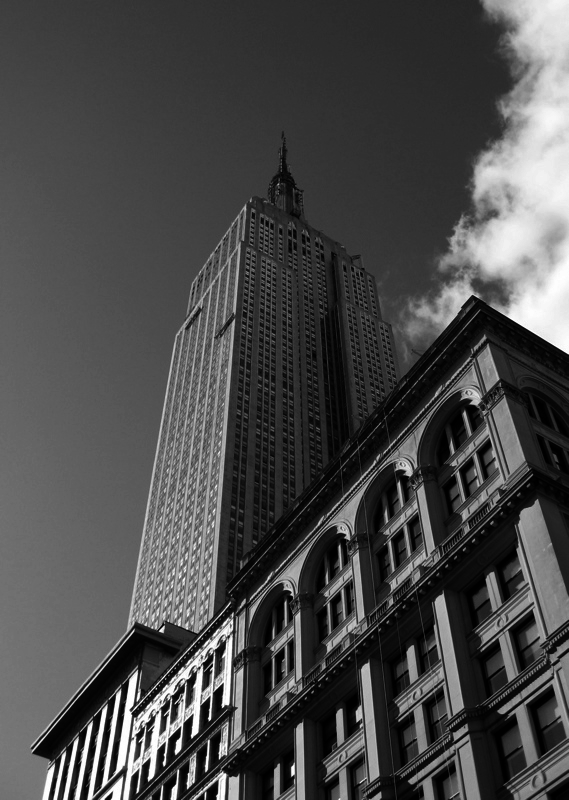

In [19]:
Image.fromarray(uint8(255.0 * (im/255.0)**2))  # 将图像像素求平方后的图像

## 图像缩放
---

In [20]:
def imresize(im,sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

## 直方图均衡化
---

In [21]:
def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    if type(im) == Image.Image:
        im = array(im)
    # 计算直方图
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # 计算分布函数
    cdf = 255 * cdf / cdf[-1] # normalize 归一化
    
    # 用积累分布函数的线性插值,计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
    im2 = Image.fromarray(uint8(im2.reshape(im.shape)))
    
    return im2,cdf

In [22]:
# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

In [23]:
im = pil_im.copy()
im2, cdf = histeq(im)

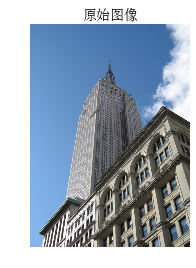

In [24]:
axis('off')
title(u'原始图像', fontproperties=font)
imshow(im)

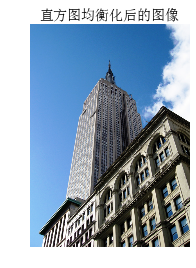

In [25]:
axis('off')
title(u'直方图均衡化后的图像', fontproperties=font)
imshow(im2)

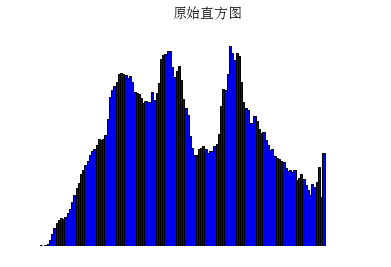

In [26]:
axis('off')
title(u'原始直方图', fontproperties=font)
hist(array(im).flatten(), 128, normed=True)
show()

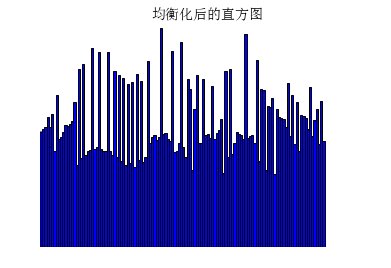

In [27]:
axis('off')
title(u'均衡化后的直方图', fontproperties=font)
hist(array(im2).flatten(), 128, normed=True)
show()

### OpenCV 版直方图均衡化
---

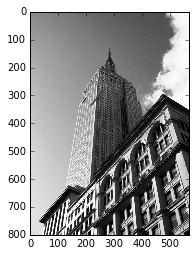

In [28]:
im = cv2.cvtColor(array(pil_im),cv2.COLOR_BGR2GRAY)  # 转为灰度图像
imshow(cv2.equalizeHist(im))

## 图像平均
---
用于减少噪声的简单方式,常用于艺术特效

In [29]:
def compute_average(imlist):
    """    Compute the average of a list of images. """
    
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f') 

    skipped = 0
    
    for imname in imlist[1:]:
        try: 
            averageim += array(Image.open(imname))
        except:
            print imname + "...skipped"  
            skipped += 1

    averageim /= (len(imlist) - skipped)
    
    # return average as uint8
    return array(averageim, 'uint8')

## 主成份分析(PCA, Principal Component Analysis)
---
* PCA产生的投影矩阵可以看成将原始坐标变换到现有坐标,坐标系中各个坐标按照重要性递减排列
* 

In [30]:
def pca(X):
    """    主成份分析
        输入: X, 矩阵,每一行为一条训练数据(训练图像)
        返回: 投影矩阵(按照维度的重要性排序),方差,均值
    """
    
    # 获取维数
    num_data,dim = X.shape
    
    # 数据中心化
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim>num_data:
        # PCA - 使用紧致技巧
        M = dot(X,X.T) # 协方差矩阵 covariance matrix
        e,EV = linalg.eigh(M) # 特征值和特征向量 eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick(紧致技巧)
        V = tmp[::-1] # 由于最后的特征向量是我们需要的,所以需要进行逆转(reverse)
        S = sqrt(e)[::-1] # 由于特征值是递增排序的,所以也要逆转
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        # PCA - SVD 使用方法
        U,S,V = linalg.svd(X)
        V = V[:num_data] # 仅返回前 num_data 维的数据才合理
    
    # 返回: 投影矩阵,方差,均值
    return V,S,mean_X

In [31]:
import os
def get_imlist(path):
    """    Returns a list of filenames for 
        all jpg images in a directory. """
        
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

The number of images is 2359


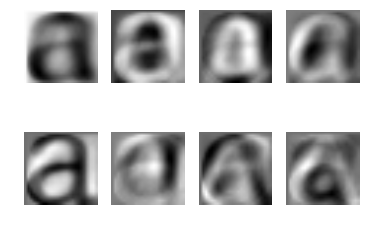

In [32]:
# 获取图像列表和他们的尺寸
imlist = get_imlist('a_thumbs')
im = array(Image.open(imlist[0]))  # open one image to get the size
m, n = im.shape[:2]  # get the size of the images
imnbr = len(imlist)  # get the number of images
print "The number of images is %d" % imnbr

# Create matrix to store(存储) all flattened images(压平的图像)
immatrix = array([array(Image.open(imname)).flatten() for imname in imlist], 'f')

# PCA降维
V, S, immean = pca(immatrix)

# 显示图像(均值,和前 7 维图像
figure()
gray()
subplot(2, 4, 1)
axis('off')
imshow(immean.reshape(m, n))
for i in range(7):
    subplot(2, 4, i+2)
    imshow(V[i].reshape(m, n))
    axis('off')
show()

### OpenCV 版
---
主要函数说明:
```python
cv2.PCACompute(data[, mean[, eigenvectors[, maxComponents ]]]) -> mean, eigenvectors
cv2.PCAComputeVar(data, retainedVariance[, mean[, eigenvectors ]]) -> mean, eigenvectors
cv2.PCAProject(data, mean, eigenvectors[, result ]) -> result
cv2.PCABackProject(data, mean, eigenvectors[, result ]) -> result
```
其中:

* data 是输入的数据集
* mean 是均值向量
* eigenvectors 是特征值向量
* maxComponents 是保留的维数,默认为全部保存
* retainedVariance 是PCA保留的向量百分比,即保留的个数自动计算,但至少为2个
* PCAProject 将输入数据vec(该数据是用来提取PCA特征的原始数据)投影到PCA主成分空间中，返回每一个样本主成分特征组成的矩阵。因为经过PCA处理后，原始数据的维数降低了，因此原始数据集中的每一个样本的维数都变了，由改变后的样本集就组成了本函数的返回值。
* PCABackProject 函数的参数vec为经过PCA投影降维(PCAProject)过后的矩阵。用来重构原始数据集

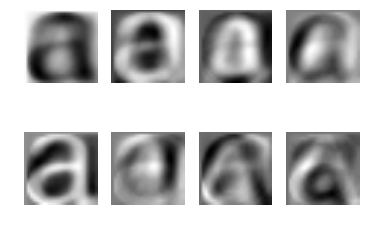

In [33]:
import cv2
mean, eig = cv2.PCACompute(immatrix,None)

# 显示图像(均值,和前 7 维图像
figure()
gray()
subplot(2, 4, 1)
axis('off')
imshow(mean.reshape(m, n))
for i in range(7):
    subplot(2, 4, i+2)
    imshow(eig[i].reshape(m, n))
    axis('off')
show()

# Scipy
---
